In [4]:
from sklearn.datasets import fetch_20newsgroups
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB

### importing data 

In [11]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [10]:
newsgroups=fetch_20newsgroups()

In [9]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\blank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\blank\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
stops=set(stopwords.words('english'))
punctuations=list(string.punctuation)
stops.update(punctuations)

In [16]:
all_documents=newsgroups.data
#all_documents contains all the "X" data in un-tokenized form.
all_categories=newsgroups.target
#all_cateories contain all the "Y" data.
all_documents_modified=[word_tokenize(doc) for doc in all_documents]
#tokenizing data for each document

In [18]:
all_documents_modified

[['From',
  ':',
  'lerxst',
  '@',
  'wam.umd.edu',
  '(',
  'where',
  "'s",
  'my',
  'thing',
  ')',
  'Subject',
  ':',
  'WHAT',
  'car',
  'is',
  'this',
  '!',
  '?',
  'Nntp-Posting-Host',
  ':',
  'rac3.wam.umd.edu',
  'Organization',
  ':',
  'University',
  'of',
  'Maryland',
  ',',
  'College',
  'Park',
  'Lines',
  ':',
  '15',
  'I',
  'was',
  'wondering',
  'if',
  'anyone',
  'out',
  'there',
  'could',
  'enlighten',
  'me',
  'on',
  'this',
  'car',
  'I',
  'saw',
  'the',
  'other',
  'day',
  '.',
  'It',
  'was',
  'a',
  '2-door',
  'sports',
  'car',
  ',',
  'looked',
  'to',
  'be',
  'from',
  'the',
  'late',
  '60s/',
  'early',
  '70s',
  '.',
  'It',
  'was',
  'called',
  'a',
  'Bricklin',
  '.',
  'The',
  'doors',
  'were',
  'really',
  'small',
  '.',
  'In',
  'addition',
  ',',
  'the',
  'front',
  'bumper',
  'was',
  'separate',
  'from',
  'the',
  'rest',
  'of',
  'the',
  'body',
  '.',
  'This',
  'is',
  'all',
  'I',
  'know',
  '

In [20]:
x_train, x_test, y_train, y_test=train_test_split(all_documents_modified, all_categories, random_state=1)

In [21]:
all_words=[]
#this variable is going to contain all the words from all our tokenized documents.
for doc in x_train:
    for word in doc:
        if (word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word[0]!="'":
            #not including words which are in stops and whose lenght is either 1 or 2 
            all_words.append(word)

In [22]:
len(all_words)

1385675

### Getting freq of words and arranging them in descending order

In [24]:
def freq_words(all_words):
    dic = dict()
    for i in all_words:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i] = 1
    return dic

In [25]:
dic = freq_words(all_words)

In [26]:
freq=np.array([i for i in dic.values()])
words=np.array([i for i in dic.keys()])
#getting freq and words in 2 different array for drawing graph 

In [27]:
words=words[np.argsort(freq)][::-1]
freq=np.sort(freq)[::-1]
# arranging them in descending order 

### Plotting freq vs no.of words and chossing the cutoff 

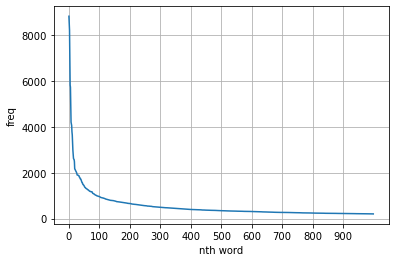

<Figure size 2520x2520 with 0 Axes>

In [37]:
plt.plot(np.arange(len(freq))[0:1000],freq[0:1000])# only choosing till 1000
plt.xlabel("nth word")
plt.ylabel("freq")
plt.grid()
plt.xticks(np.arange(0,1000,100))
plt.figure(figsize=(35,35))
plt.show()

In [38]:
#choosing features 
features=words[25:100000]# throwing out high freq words because they would be in every document and not useful for clasification

In [39]:
def data_modifier(x_data, features):
    modified_data=np.zeros((len(x_data), len(features)))
    count=0
    max_count=len(x_data)
    for i in range(len(x_data)):
        current_doc=x_data[i]# for every document 
        d=dict()#this dict stores the freq of every word in the document 
        for word in current_doc:
            if word in d.keys():
                d[word]+=1#if the word aldready exist increase 
            else:
                d[word]=1
        for j in range(len(features)):
            if features[j] in d.keys():
                modified_data[i][j]=d[features[j]] # increase it by the freq of the feature occured in the document
            else:
                continue
        count+=1
        print("progress: ", (count*100)/max_count, "%")#to check how much is done 
    return modified_data 

In [40]:
x_train_modified = data_modifier(x_train, features)

progress:  0.011785503830288745 %
progress:  0.02357100766057749 %
progress:  0.03535651149086624 %
progress:  0.04714201532115498 %
progress:  0.05892751915144372 %
progress:  0.07071302298173247 %
progress:  0.08249852681202122 %
progress:  0.09428403064230996 %
progress:  0.1060695344725987 %
progress:  0.11785503830288745 %
progress:  0.1296405421331762 %
progress:  0.14142604596346495 %
progress:  0.15321154979375368 %
progress:  0.16499705362404243 %
progress:  0.17678255745433116 %
progress:  0.18856806128461992 %
progress:  0.20035356511490865 %
progress:  0.2121390689451974 %
progress:  0.22392457277548616 %
progress:  0.2357100766057749 %
progress:  0.24749558043606365 %
progress:  0.2592810842663524 %
progress:  0.27106658809664114 %
progress:  0.2828520919269299 %
progress:  0.2946375957572186 %
progress:  0.30642309958750735 %
progress:  0.3182086034177961 %
progress:  0.32999410724808487 %
progress:  0.3417796110783736 %
progress:  0.3535651149086623 %
progress:  0.365350

progress:  3.0878020035356513 %
progress:  3.09958750736594 %
progress:  3.1113730111962288 %
progress:  3.1231585150265175 %
progress:  3.1349440188568063 %
progress:  3.146729522687095 %
progress:  3.158515026517384 %
progress:  3.1703005303476726 %
progress:  3.1820860341779613 %
progress:  3.1938715380082496 %
progress:  3.2056570418385384 %
progress:  3.217442545668827 %
progress:  3.229228049499116 %
progress:  3.2410135533294047 %
progress:  3.2527990571596934 %
progress:  3.264584560989982 %
progress:  3.276370064820271 %
progress:  3.2881555686505597 %
progress:  3.2999410724808484 %
progress:  3.311726576311137 %
progress:  3.323512080141426 %
progress:  3.3352975839717147 %
progress:  3.3470830878020035 %
progress:  3.3588685916322922 %
progress:  3.370654095462581 %
progress:  3.3824395992928697 %
progress:  3.3942251031231585 %
progress:  3.4060106069534473 %
progress:  3.417796110783736 %
progress:  3.4295816146140248 %
progress:  3.4413671184443135 %
progress:  3.4531526

progress:  6.19917501473188 %
progress:  6.210960518562168 %
progress:  6.2227460223924576 %
progress:  6.234531526222746 %
progress:  6.246317030053035 %
progress:  6.258102533883323 %
progress:  6.269888037713613 %
progress:  6.281673541543901 %
progress:  6.29345904537419 %
progress:  6.305244549204478 %
progress:  6.317030053034768 %
progress:  6.328815556865056 %
progress:  6.340601060695345 %
progress:  6.352386564525633 %
progress:  6.364172068355923 %
progress:  6.375957572186211 %
progress:  6.387743076016499 %
progress:  6.3995285798467885 %
progress:  6.411314083677077 %
progress:  6.423099587507366 %
progress:  6.434885091337654 %
progress:  6.4466705951679435 %
progress:  6.458456098998232 %
progress:  6.470241602828521 %
progress:  6.482027106658809 %
progress:  6.4938126104890985 %
progress:  6.505598114319387 %
progress:  6.517383618149676 %
progress:  6.529169121979964 %
progress:  6.5409546258102536 %
progress:  6.552740129640542 %
progress:  6.564525633470831 %
progr

progress:  9.334119033588687 %
progress:  9.345904537418974 %
progress:  9.357690041249263 %
progress:  9.369475545079553 %
progress:  9.38126104890984 %
progress:  9.39304655274013 %
progress:  9.404832056570418 %
progress:  9.416617560400708 %
progress:  9.428403064230995 %
progress:  9.440188568061284 %
progress:  9.451974071891573 %
progress:  9.463759575721863 %
progress:  9.47554507955215 %
progress:  9.48733058338244 %
progress:  9.499116087212728 %
progress:  9.510901591043018 %
progress:  9.522687094873305 %
progress:  9.534472598703594 %
progress:  9.546258102533884 %
progress:  9.558043606364173 %
progress:  9.56982911019446 %
progress:  9.58161461402475 %
progress:  9.593400117855039 %
progress:  9.605185621685328 %
progress:  9.616971125515615 %
progress:  9.628756629345904 %
progress:  9.640542133176194 %
progress:  9.652327637006483 %
progress:  9.66411314083677 %
progress:  9.67589864466706 %
progress:  9.687684148497349 %
progress:  9.699469652327638 %
progress:  9.711

progress:  12.39835002946376 %
progress:  12.410135533294048 %
progress:  12.421921037124337 %
progress:  12.433706540954626 %
progress:  12.445492044784915 %
progress:  12.457277548615203 %
progress:  12.469063052445492 %
progress:  12.480848556275781 %
progress:  12.49263406010607 %
progress:  12.504419563936358 %
progress:  12.516205067766647 %
progress:  12.527990571596936 %
progress:  12.539776075427225 %
progress:  12.551561579257513 %
progress:  12.563347083087802 %
progress:  12.575132586918091 %
progress:  12.58691809074838 %
progress:  12.598703594578668 %
progress:  12.610489098408957 %
progress:  12.622274602239246 %
progress:  12.634060106069535 %
progress:  12.645845609899823 %
progress:  12.657631113730112 %
progress:  12.669416617560401 %
progress:  12.68120212139069 %
progress:  12.692987625220978 %
progress:  12.704773129051267 %
progress:  12.716558632881556 %
progress:  12.728344136711845 %
progress:  12.740129640542133 %
progress:  12.751915144372422 %
progress:  1

progress:  15.474366529169123 %
progress:  15.48615203299941 %
progress:  15.4979375368297 %
progress:  15.509723040659988 %
progress:  15.521508544490278 %
progress:  15.533294048320565 %
progress:  15.545079552150854 %
progress:  15.556865055981143 %
progress:  15.568650559811433 %
progress:  15.58043606364172 %
progress:  15.59222156747201 %
progress:  15.604007071302298 %
progress:  15.615792575132588 %
progress:  15.627578078962875 %
progress:  15.639363582793164 %
progress:  15.651149086623453 %
progress:  15.662934590453743 %
progress:  15.67472009428403 %
progress:  15.68650559811432 %
progress:  15.698291101944609 %
progress:  15.710076605774898 %
progress:  15.721862109605185 %
progress:  15.733647613435474 %
progress:  15.745433117265764 %
progress:  15.757218621096051 %
progress:  15.76900412492634 %
progress:  15.78078962875663 %
progress:  15.792575132586919 %
progress:  15.804360636417206 %
progress:  15.816146140247495 %
progress:  15.827931644077784 %
progress:  15.839

progress:  18.526812021213907 %
progress:  18.538597525044196 %
progress:  18.550383028874485 %
progress:  18.562168532704774 %
progress:  18.573954036535063 %
progress:  18.58573954036535 %
progress:  18.59752504419564 %
progress:  18.609310548025928 %
progress:  18.621096051856217 %
progress:  18.632881555686506 %
progress:  18.644667059516795 %
progress:  18.656452563347084 %
progress:  18.668238067177374 %
progress:  18.68002357100766 %
progress:  18.69180907483795 %
progress:  18.703594578668238 %
progress:  18.715380082498527 %
progress:  18.727165586328816 %
progress:  18.738951090159105 %
progress:  18.750736593989394 %
progress:  18.76252209781968 %
progress:  18.77430760164997 %
progress:  18.78609310548026 %
progress:  18.797878609310548 %
progress:  18.809664113140837 %
progress:  18.821449616971126 %
progress:  18.833235120801415 %
progress:  18.845020624631704 %
progress:  18.85680612846199 %
progress:  18.86859163229228 %
progress:  18.88037713612257 %
progress:  18.8921

progress:  21.661756040070713 %
progress:  21.673541543901003 %
progress:  21.685327047731292 %
progress:  21.69711255156158 %
progress:  21.708898055391867 %
progress:  21.720683559222156 %
progress:  21.732469063052445 %
progress:  21.744254566882734 %
progress:  21.756040070713023 %
progress:  21.767825574543313 %
progress:  21.779611078373602 %
progress:  21.791396582203888 %
progress:  21.803182086034177 %
progress:  21.814967589864466 %
progress:  21.826753093694755 %
progress:  21.838538597525044 %
progress:  21.850324101355334 %
progress:  21.862109605185623 %
progress:  21.873895109015912 %
progress:  21.885680612846198 %
progress:  21.897466116676487 %
progress:  21.909251620506776 %
progress:  21.921037124337065 %
progress:  21.932822628167354 %
progress:  21.944608131997644 %
progress:  21.956393635827933 %
progress:  21.968179139658222 %
progress:  21.979964643488508 %
progress:  21.991750147318797 %
progress:  22.003535651149086 %
progress:  22.015321154979375 %
progress:

progress:  24.737772539776074 %
progress:  24.749558043606363 %
progress:  24.761343547436653 %
progress:  24.77312905126694 %
progress:  24.78491455509723 %
progress:  24.79670005892752 %
progress:  24.80848556275781 %
progress:  24.820271066588095 %
progress:  24.832056570418384 %
progress:  24.843842074248673 %
progress:  24.855627578078963 %
progress:  24.867413081909252 %
progress:  24.87919858573954 %
progress:  24.89098408956983 %
progress:  24.90276959340012 %
progress:  24.914555097230405 %
progress:  24.926340601060694 %
progress:  24.938126104890983 %
progress:  24.949911608721273 %
progress:  24.961697112551562 %
progress:  24.97348261638185 %
progress:  24.98526812021214 %
progress:  24.99705362404243 %
progress:  25.008839127872715 %
progress:  25.020624631703004 %
progress:  25.032410135533294 %
progress:  25.044195639363583 %
progress:  25.055981143193872 %
progress:  25.06776664702416 %
progress:  25.07955215085445 %
progress:  25.09133765468474 %
progress:  25.1031231

progress:  27.80200353565115 %
progress:  27.81378903948144 %
progress:  27.825574543311728 %
progress:  27.837360047142017 %
progress:  27.849145550972302 %
progress:  27.86093105480259 %
progress:  27.87271655863288 %
progress:  27.88450206246317 %
progress:  27.89628756629346 %
progress:  27.90807307012375 %
progress:  27.919858573954038 %
progress:  27.931644077784327 %
progress:  27.943429581614613 %
progress:  27.9552150854449 %
progress:  27.96700058927519 %
progress:  27.97878609310548 %
progress:  27.99057159693577 %
progress:  28.00235710076606 %
progress:  28.014142604596348 %
progress:  28.025928108426637 %
progress:  28.037713612256923 %
progress:  28.049499116087212 %
progress:  28.0612846199175 %
progress:  28.07307012374779 %
progress:  28.08485562757808 %
progress:  28.09664113140837 %
progress:  28.108426635238658 %
progress:  28.120212139068943 %
progress:  28.131997642899233 %
progress:  28.143783146729522 %
progress:  28.15556865055981 %
progress:  28.1673541543901

progress:  30.854449027695935 %
progress:  30.866234531526224 %
progress:  30.87802003535651 %
progress:  30.8898055391868 %
progress:  30.90159104301709 %
progress:  30.913376546847378 %
progress:  30.925162050677667 %
progress:  30.936947554507956 %
progress:  30.948733058338245 %
progress:  30.960518562168534 %
progress:  30.97230406599882 %
progress:  30.98408956982911 %
progress:  30.9958750736594 %
progress:  31.007660577489688 %
progress:  31.019446081319977 %
progress:  31.031231585150266 %
progress:  31.043017088980555 %
progress:  31.054802592810844 %
progress:  31.06658809664113 %
progress:  31.07837360047142 %
progress:  31.09015910430171 %
progress:  31.101944608131998 %
progress:  31.113730111962287 %
progress:  31.125515615792576 %
progress:  31.137301119622865 %
progress:  31.14908662345315 %
progress:  31.16087212728344 %
progress:  31.17265763111373 %
progress:  31.18444313494402 %
progress:  31.196228638774308 %
progress:  31.208014142604597 %
progress:  31.219799646

progress:  33.942251031231585 %
progress:  33.954036535061874 %
progress:  33.96582203889216 %
progress:  33.97760754272245 %
progress:  33.98939304655274 %
progress:  34.00117855038303 %
progress:  34.01296405421332 %
progress:  34.02474955804361 %
progress:  34.0365350618739 %
progress:  34.04832056570418 %
progress:  34.06010606953447 %
progress:  34.07189157336476 %
progress:  34.08367707719505 %
progress:  34.09546258102534 %
progress:  34.10724808485563 %
progress:  34.119033588685916 %
progress:  34.130819092516205 %
progress:  34.142604596346494 %
progress:  34.154390100176784 %
progress:  34.16617560400707 %
progress:  34.17796110783736 %
progress:  34.18974661166765 %
progress:  34.20153211549794 %
progress:  34.21331761932823 %
progress:  34.22510312315851 %
progress:  34.2368886269888 %
progress:  34.24867413081909 %
progress:  34.26045963464938 %
progress:  34.27224513847967 %
progress:  34.28403064230996 %
progress:  34.29581614614025 %
progress:  34.307601649970536 %
pro

progress:  37.07719505008839 %
progress:  37.08898055391868 %
progress:  37.10076605774897 %
progress:  37.11255156157926 %
progress:  37.12433706540955 %
progress:  37.13612256923984 %
progress:  37.14790807307013 %
progress:  37.15969357690041 %
progress:  37.1714790807307 %
progress:  37.18326458456099 %
progress:  37.19505008839128 %
progress:  37.206835592221566 %
progress:  37.218621096051855 %
progress:  37.230406599882144 %
progress:  37.24219210371243 %
progress:  37.25397760754272 %
progress:  37.26576311137301 %
progress:  37.2775486152033 %
progress:  37.28933411903359 %
progress:  37.30111962286388 %
progress:  37.31290512669417 %
progress:  37.32469063052446 %
progress:  37.33647613435475 %
progress:  37.34826163818503 %
progress:  37.36004714201532 %
progress:  37.37183264584561 %
progress:  37.3836181496759 %
progress:  37.395403653506186 %
progress:  37.407189157336475 %
progress:  37.418974661166764 %
progress:  37.430760164997054 %
progress:  37.44254566882734 %
prog

progress:  40.18856806128462 %
progress:  40.20035356511491 %
progress:  40.2121390689452 %
progress:  40.22392457277549 %
progress:  40.23571007660578 %
progress:  40.247495580436066 %
progress:  40.259281084266355 %
progress:  40.271066588096645 %
progress:  40.28285209192693 %
progress:  40.294637595757216 %
progress:  40.306423099587505 %
progress:  40.318208603417794 %
progress:  40.32999410724808 %
progress:  40.34177961107837 %
progress:  40.35356511490866 %
progress:  40.36535061873895 %
progress:  40.37713612256924 %
progress:  40.38892162639953 %
progress:  40.40070713022982 %
progress:  40.41249263406011 %
progress:  40.4242781378904 %
progress:  40.436063641720686 %
progress:  40.447849145550975 %
progress:  40.45963464938126 %
progress:  40.47142015321155 %
progress:  40.483205657041836 %
progress:  40.494991160872125 %
progress:  40.506776664702414 %
progress:  40.5185621685327 %
progress:  40.53034767236299 %
progress:  40.54213317619328 %
progress:  40.55391868002357 %


progress:  43.31172657631114 %
progress:  43.32351208014143 %
progress:  43.335297583971716 %
progress:  43.347083087802005 %
progress:  43.358868591632294 %
progress:  43.370654095462584 %
progress:  43.38243959929287 %
progress:  43.39422510312316 %
progress:  43.406010606953444 %
progress:  43.41779611078373 %
progress:  43.42958161461402 %
progress:  43.44136711844431 %
progress:  43.4531526222746 %
progress:  43.46493812610489 %
progress:  43.47672362993518 %
progress:  43.48850913376547 %
progress:  43.50029463759576 %
progress:  43.51208014142605 %
progress:  43.523865645256336 %
progress:  43.535651149086625 %
progress:  43.547436652916915 %
progress:  43.559222156747204 %
progress:  43.57100766057749 %
progress:  43.582793164407775 %
progress:  43.594578668238064 %
progress:  43.60636417206835 %
progress:  43.61814967589864 %
progress:  43.62993517972893 %
progress:  43.64172068355922 %
progress:  43.65350618738951 %
progress:  43.6652916912198 %
progress:  43.67707719505009 %

progress:  46.41131408367708 %
progress:  46.423099587507366 %
progress:  46.434885091337655 %
progress:  46.446670595167944 %
progress:  46.458456098998234 %
progress:  46.47024160282852 %
progress:  46.48202710665881 %
progress:  46.4938126104891 %
progress:  46.50559811431939 %
progress:  46.51738361814967 %
progress:  46.52916912197996 %
progress:  46.54095462581025 %
progress:  46.55274012964054 %
progress:  46.56452563347083 %
progress:  46.57631113730112 %
progress:  46.58809664113141 %
progress:  46.5998821449617 %
progress:  46.611667648791986 %
progress:  46.623453152622275 %
progress:  46.635238656452564 %
progress:  46.647024160282854 %
progress:  46.65880966411314 %
progress:  46.67059516794343 %
progress:  46.68238067177372 %
progress:  46.69416617560401 %
progress:  46.70595167943429 %
progress:  46.71773718326458 %
progress:  46.72952268709487 %
progress:  46.74130819092516 %
progress:  46.75309369475545 %
progress:  46.76487919858574 %
progress:  46.77666470241603 %
pr

progress:  49.522687094873305 %
progress:  49.534472598703594 %
progress:  49.54625810253388 %
progress:  49.55804360636417 %
progress:  49.56982911019446 %
progress:  49.58161461402475 %
progress:  49.59340011785504 %
progress:  49.60518562168533 %
progress:  49.61697112551562 %
progress:  49.62875662934591 %
progress:  49.64054213317619 %
progress:  49.65232763700648 %
progress:  49.66411314083677 %
progress:  49.67589864466706 %
progress:  49.68768414849735 %
progress:  49.699469652327636 %
progress:  49.711255156157925 %
progress:  49.723040659988214 %
progress:  49.734826163818504 %
progress:  49.74661166764879 %
progress:  49.75839717147908 %
progress:  49.77018267530937 %
progress:  49.78196817913966 %
progress:  49.79375368296995 %
progress:  49.80553918680024 %
progress:  49.81732469063052 %
progress:  49.82911019446081 %
progress:  49.8408956982911 %
progress:  49.85268120212139 %
progress:  49.86446670595168 %
progress:  49.87625220978197 %
progress:  49.888037713612256 %
pr

progress:  52.65763111373011 %
progress:  52.6694166175604 %
progress:  52.68120212139069 %
progress:  52.69298762522098 %
progress:  52.70477312905127 %
progress:  52.71655863288156 %
progress:  52.72834413671185 %
progress:  52.740129640542136 %
progress:  52.751915144372425 %
progress:  52.76370064820271 %
progress:  52.775486152033 %
progress:  52.787271655863286 %
progress:  52.799057159693575 %
progress:  52.810842663523864 %
progress:  52.822628167354154 %
progress:  52.83441367118444 %
progress:  52.84619917501473 %
progress:  52.85798467884502 %
progress:  52.86977018267531 %
progress:  52.8815556865056 %
progress:  52.89334119033589 %
progress:  52.90512669416618 %
progress:  52.91691219799647 %
progress:  52.928697701826756 %
progress:  52.94048320565704 %
progress:  52.95226870948733 %
progress:  52.96405421331762 %
progress:  52.975839717147906 %
progress:  52.987625220978195 %
progress:  52.999410724808484 %
progress:  53.011196228638774 %
progress:  53.02298173246906 %
p

progress:  55.78078962875663 %
progress:  55.79257513258692 %
progress:  55.80436063641721 %
progress:  55.8161461402475 %
progress:  55.827931644077786 %
progress:  55.839717147908075 %
progress:  55.851502651738365 %
progress:  55.863288155568654 %
progress:  55.875073659398936 %
progress:  55.886859163229225 %
progress:  55.898644667059514 %
progress:  55.9104301708898 %
progress:  55.92221567472009 %
progress:  55.93400117855038 %
progress:  55.94578668238067 %
progress:  55.95757218621096 %
progress:  55.96935769004125 %
progress:  55.98114319387154 %
progress:  55.99292869770183 %
progress:  56.00471420153212 %
progress:  56.016499705362406 %
progress:  56.028285209192696 %
progress:  56.040070713022985 %
progress:  56.051856216853274 %
progress:  56.063641720683556 %
progress:  56.075427224513845 %
progress:  56.087212728344134 %
progress:  56.098998232174424 %
progress:  56.11078373600471 %
progress:  56.122569239835 %
progress:  56.13435474366529 %
progress:  56.14614024749558

progress:  58.927519151443725 %
progress:  58.939304655274015 %
progress:  58.951090159104304 %
progress:  58.96287566293459 %
progress:  58.97466116676488 %
progress:  58.98644667059517 %
progress:  58.99823217442545 %
progress:  59.01001767825574 %
progress:  59.02180318208603 %
progress:  59.03358868591632 %
progress:  59.04537418974661 %
progress:  59.0571596935769 %
progress:  59.06894519740719 %
progress:  59.08073070123748 %
progress:  59.09251620506777 %
progress:  59.104301708898056 %
progress:  59.116087212728345 %
progress:  59.127872716558635 %
progress:  59.139658220388924 %
progress:  59.15144372421921 %
progress:  59.1632292280495 %
progress:  59.175014731879784 %
progress:  59.18680023571007 %
progress:  59.19858573954036 %
progress:  59.21037124337065 %
progress:  59.22215674720094 %
progress:  59.23394225103123 %
progress:  59.24572775486152 %
progress:  59.25751325869181 %
progress:  59.2692987625221 %
progress:  59.28108426635239 %
progress:  59.292869770182676 %
pr

progress:  62.07424867413082 %
progress:  62.08603417796111 %
progress:  62.0978196817914 %
progress:  62.10960518562169 %
progress:  62.12139068945197 %
progress:  62.13317619328226 %
progress:  62.14496169711255 %
progress:  62.15674720094284 %
progress:  62.16853270477313 %
progress:  62.18031820860342 %
progress:  62.192103712433706 %
progress:  62.203889216263995 %
progress:  62.215674720094285 %
progress:  62.227460223924574 %
progress:  62.23924572775486 %
progress:  62.25103123158515 %
progress:  62.26281673541544 %
progress:  62.27460223924573 %
progress:  62.28638774307602 %
progress:  62.2981732469063 %
progress:  62.30995875073659 %
progress:  62.32174425456688 %
progress:  62.33352975839717 %
progress:  62.34531526222746 %
progress:  62.35710076605775 %
progress:  62.36888626988804 %
progress:  62.380671773718326 %
progress:  62.392457277548615 %
progress:  62.404242781378905 %
progress:  62.416028285209194 %
progress:  62.42781378903948 %
progress:  62.43959929286977 %
pr

progress:  65.20919269298763 %
progress:  65.22097819681791 %
progress:  65.2327637006482 %
progress:  65.24454920447849 %
progress:  65.25633470830878 %
progress:  65.26812021213907 %
progress:  65.27990571596936 %
progress:  65.29169121979965 %
progress:  65.30347672362994 %
progress:  65.31526222746022 %
progress:  65.3270477312905 %
progress:  65.3388332351208 %
progress:  65.35061873895108 %
progress:  65.36240424278138 %
progress:  65.37418974661166 %
progress:  65.38597525044196 %
progress:  65.39776075427224 %
progress:  65.40954625810254 %
progress:  65.42133176193282 %
progress:  65.43311726576312 %
progress:  65.4449027695934 %
progress:  65.4566882734237 %
progress:  65.46847377725398 %
progress:  65.48025928108427 %
progress:  65.49204478491455 %
progress:  65.50383028874485 %
progress:  65.51561579257513 %
progress:  65.52740129640542 %
progress:  65.53918680023571 %
progress:  65.550972304066 %
progress:  65.56275780789629 %
progress:  65.57454331172657 %
progress:  65.5

progress:  68.35592221567472 %
progress:  68.367707719505 %
progress:  68.3794932233353 %
progress:  68.39127872716558 %
progress:  68.40306423099588 %
progress:  68.41484973482616 %
progress:  68.42663523865646 %
progress:  68.43842074248674 %
progress:  68.45020624631702 %
progress:  68.46199175014732 %
progress:  68.4737772539776 %
progress:  68.4855627578079 %
progress:  68.49734826163818 %
progress:  68.50913376546848 %
progress:  68.52091926929876 %
progress:  68.53270477312905 %
progress:  68.54449027695934 %
progress:  68.55627578078963 %
progress:  68.56806128461992 %
progress:  68.57984678845021 %
progress:  68.5916322922805 %
progress:  68.60341779611079 %
progress:  68.61520329994107 %
progress:  68.62698880377135 %
progress:  68.63877430760165 %
progress:  68.65055981143193 %
progress:  68.66234531526223 %
progress:  68.67413081909251 %
progress:  68.68591632292281 %
progress:  68.69770182675309 %
progress:  68.70948733058339 %
progress:  68.72127283441367 %
progress:  68.

progress:  71.5262227460224 %
progress:  71.53800824985268 %
progress:  71.54979375368298 %
progress:  71.56157925751326 %
progress:  71.57336476134354 %
progress:  71.58515026517384 %
progress:  71.59693576900412 %
progress:  71.60872127283442 %
progress:  71.6205067766647 %
progress:  71.632292280495 %
progress:  71.64407778432528 %
progress:  71.65586328815557 %
progress:  71.66764879198585 %
progress:  71.67943429581615 %
progress:  71.69121979964643 %
progress:  71.70300530347673 %
progress:  71.71479080730701 %
progress:  71.72657631113731 %
progress:  71.73836181496759 %
progress:  71.75014731879787 %
progress:  71.76193282262817 %
progress:  71.77371832645845 %
progress:  71.78550383028875 %
progress:  71.79728933411903 %
progress:  71.80907483794932 %
progress:  71.8208603417796 %
progress:  71.8326458456099 %
progress:  71.84443134944019 %
progress:  71.85621685327048 %
progress:  71.86800235710076 %
progress:  71.87978786093106 %
progress:  71.89157336476134 %
progress:  71.

progress:  74.68473777253978 %
progress:  74.69652327637006 %
progress:  74.70830878020035 %
progress:  74.72009428403064 %
progress:  74.73187978786093 %
progress:  74.74366529169122 %
progress:  74.75545079552151 %
progress:  74.7672362993518 %
progress:  74.77902180318209 %
progress:  74.79080730701237 %
progress:  74.80259281084267 %
progress:  74.81437831467295 %
progress:  74.82616381850325 %
progress:  74.83794932233353 %
progress:  74.84973482616383 %
progress:  74.86152032999411 %
progress:  74.87330583382439 %
progress:  74.88509133765469 %
progress:  74.89687684148497 %
progress:  74.90866234531526 %
progress:  74.92044784914555 %
progress:  74.93223335297584 %
progress:  74.94401885680612 %
progress:  74.95580436063642 %
progress:  74.9675898644667 %
progress:  74.979375368297 %
progress:  74.99116087212728 %
progress:  75.00294637595758 %
progress:  75.01473187978786 %
progress:  75.02651738361816 %
progress:  75.03830288744844 %
progress:  75.05008839127872 %
progress:  7

progress:  77.85503830288745 %
progress:  77.86682380671773 %
progress:  77.87860931054803 %
progress:  77.89039481437831 %
progress:  77.90218031820861 %
progress:  77.91396582203889 %
progress:  77.92575132586919 %
progress:  77.93753682969947 %
progress:  77.94932233352976 %
progress:  77.96110783736005 %
progress:  77.97289334119034 %
progress:  77.98467884502062 %
progress:  77.9964643488509 %
progress:  78.0082498526812 %
progress:  78.02003535651149 %
progress:  78.03182086034178 %
progress:  78.04360636417206 %
progress:  78.05539186800236 %
progress:  78.06717737183264 %
progress:  78.07896287566294 %
progress:  78.09074837949322 %
progress:  78.10253388332352 %
progress:  78.1143193871538 %
progress:  78.1261048909841 %
progress:  78.13789039481438 %
progress:  78.14967589864467 %
progress:  78.16146140247496 %
progress:  78.17324690630524 %
progress:  78.18503241013553 %
progress:  78.19681791396582 %
progress:  78.20860341779611 %
progress:  78.2203889216264 %
progress:  78

progress:  81.00176782557455 %
progress:  81.01355332940483 %
progress:  81.02533883323512 %
progress:  81.0371243370654 %
progress:  81.0489098408957 %
progress:  81.06069534472599 %
progress:  81.07248084855628 %
progress:  81.08426635238656 %
progress:  81.09605185621686 %
progress:  81.10783736004714 %
progress:  81.11962286387742 %
progress:  81.13140836770772 %
progress:  81.143193871538 %
progress:  81.1549793753683 %
progress:  81.16676487919858 %
progress:  81.17855038302888 %
progress:  81.19033588685916 %
progress:  81.20212139068946 %
progress:  81.21390689451974 %
progress:  81.22569239835003 %
progress:  81.23747790218032 %
progress:  81.24926340601061 %
progress:  81.2610489098409 %
progress:  81.27283441367119 %
progress:  81.28461991750147 %
progress:  81.29640542133176 %
progress:  81.30819092516205 %
progress:  81.31997642899233 %
progress:  81.33176193282263 %
progress:  81.34354743665291 %
progress:  81.35533294048321 %
progress:  81.36711844431349 %
progress:  81.

progress:  84.14849734826164 %
progress:  84.16028285209192 %
progress:  84.17206835592222 %
progress:  84.1838538597525 %
progress:  84.1956393635828 %
progress:  84.20742486741308 %
progress:  84.21921037124338 %
progress:  84.23099587507366 %
progress:  84.24278137890394 %
progress:  84.25456688273424 %
progress:  84.26635238656452 %
progress:  84.27813789039482 %
progress:  84.2899233942251 %
progress:  84.3017088980554 %
progress:  84.31349440188568 %
progress:  84.32527990571597 %
progress:  84.33706540954626 %
progress:  84.34885091337655 %
progress:  84.36063641720683 %
progress:  84.37242192103713 %
progress:  84.38420742486741 %
progress:  84.39599292869771 %
progress:  84.40777843252799 %
progress:  84.41956393635827 %
progress:  84.43134944018857 %
progress:  84.44313494401885 %
progress:  84.45492044784915 %
progress:  84.46670595167943 %
progress:  84.47849145550973 %
progress:  84.49027695934001 %
progress:  84.5020624631703 %
progress:  84.51384796700059 %
progress:  84

progress:  87.3305833824396 %
progress:  87.34236888626988 %
progress:  87.35415439010018 %
progress:  87.36593989393046 %
progress:  87.37772539776076 %
progress:  87.38951090159104 %
progress:  87.40129640542133 %
progress:  87.41308190925162 %
progress:  87.42486741308191 %
progress:  87.4366529169122 %
progress:  87.44843842074249 %
progress:  87.46022392457277 %
progress:  87.47200942840307 %
progress:  87.48379493223335 %
progress:  87.49558043606365 %
progress:  87.50736593989393 %
progress:  87.51915144372423 %
progress:  87.53093694755451 %
progress:  87.54272245138479 %
progress:  87.55450795521509 %
progress:  87.56629345904537 %
progress:  87.57807896287567 %
progress:  87.58986446670595 %
progress:  87.60164997053624 %
progress:  87.61343547436653 %
progress:  87.62522097819682 %
progress:  87.6370064820271 %
progress:  87.6487919858574 %
progress:  87.66057748968768 %
progress:  87.67236299351798 %
progress:  87.68414849734826 %
progress:  87.69593400117856 %
progress:  8

progress:  90.50088391278727 %
progress:  90.51266941661756 %
progress:  90.52445492044785 %
progress:  90.53624042427813 %
progress:  90.54802592810843 %
progress:  90.55981143193871 %
progress:  90.57159693576901 %
progress:  90.58338243959929 %
progress:  90.59516794342959 %
progress:  90.60695344725987 %
progress:  90.61873895109017 %
progress:  90.63052445492045 %
progress:  90.64230995875073 %
progress:  90.65409546258103 %
progress:  90.66588096641131 %
progress:  90.6776664702416 %
progress:  90.68945197407189 %
progress:  90.70123747790218 %
progress:  90.71302298173246 %
progress:  90.72480848556276 %
progress:  90.73659398939304 %
progress:  90.74837949322334 %
progress:  90.76016499705362 %
progress:  90.77195050088392 %
progress:  90.7837360047142 %
progress:  90.7955215085445 %
progress:  90.80730701237478 %
progress:  90.81909251620507 %
progress:  90.83087802003536 %
progress:  90.84266352386564 %
progress:  90.85444902769594 %
progress:  90.86623453152622 %
progress:  

progress:  93.67118444313495 %
progress:  93.68296994696523 %
progress:  93.69475545079553 %
progress:  93.70654095462581 %
progress:  93.7183264584561 %
progress:  93.73011196228639 %
progress:  93.74189746611668 %
progress:  93.75368296994696 %
progress:  93.76546847377725 %
progress:  93.77725397760754 %
progress:  93.78903948143783 %
progress:  93.80082498526812 %
progress:  93.8126104890984 %
progress:  93.8243959929287 %
progress:  93.83618149675898 %
progress:  93.84796700058928 %
progress:  93.85975250441956 %
progress:  93.87153800824986 %
progress:  93.88332351208014 %
progress:  93.89510901591044 %
progress:  93.90689451974072 %
progress:  93.91868002357101 %
progress:  93.9304655274013 %
progress:  93.94225103123159 %
progress:  93.95403653506187 %
progress:  93.96582203889216 %
progress:  93.97760754272245 %
progress:  93.98939304655273 %
progress:  94.00117855038303 %
progress:  94.01296405421331 %
progress:  94.02474955804361 %
progress:  94.03653506187389 %
progress:  9

progress:  96.82969946965233 %
progress:  96.84148497348262 %
progress:  96.8532704773129 %
progress:  96.8650559811432 %
progress:  96.87684148497348 %
progress:  96.88862698880376 %
progress:  96.90041249263406 %
progress:  96.91219799646434 %
progress:  96.92398350029464 %
progress:  96.93576900412492 %
progress:  96.94755450795522 %
progress:  96.9593400117855 %
progress:  96.9711255156158 %
progress:  96.98291101944608 %
progress:  96.99469652327637 %
progress:  97.00648202710666 %
progress:  97.01826753093695 %
progress:  97.03005303476723 %
progress:  97.04183853859753 %
progress:  97.05362404242781 %
progress:  97.0654095462581 %
progress:  97.07719505008839 %
progress:  97.08898055391867 %
progress:  97.10076605774897 %
progress:  97.11255156157925 %
progress:  97.12433706540955 %
progress:  97.13612256923983 %
progress:  97.14790807307013 %
progress:  97.15969357690041 %
progress:  97.1714790807307 %
progress:  97.18326458456099 %
progress:  97.19505008839128 %
progress:  97.

progress:  99.98821449616972 %
progress:  100.0 %


In [41]:
x_test_modified= data_modifier(x_test, features)

progress:  0.03534817956875221 %
progress:  0.07069635913750442 %
progress:  0.10604453870625663 %
progress:  0.14139271827500885 %
progress:  0.17674089784376104 %
progress:  0.21208907741251326 %
progress:  0.24743725698126545 %
progress:  0.2827854365500177 %
progress:  0.3181336161187699 %
progress:  0.3534817956875221 %
progress:  0.38882997525627433 %
progress:  0.4241781548250265 %
progress:  0.4595263343937787 %
progress:  0.4948745139625309 %
progress:  0.5302226935312832 %
progress:  0.5655708731000354 %
progress:  0.6009190526687875 %
progress:  0.6362672322375398 %
progress:  0.671615411806292 %
progress:  0.7069635913750442 %
progress:  0.7423117709437964 %
progress:  0.7776599505125487 %
progress:  0.8130081300813008 %
progress:  0.848356309650053 %
progress:  0.8837044892188052 %
progress:  0.9190526687875574 %
progress:  0.9544008483563097 %
progress:  0.9897490279250618 %
progress:  1.025097207493814 %
progress:  1.0604453870625663 %
progress:  1.0957935666313185 %
pro

progress:  9.331919406150583 %
progress:  9.367267585719336 %
progress:  9.402615765288088 %
progress:  9.43796394485684 %
progress:  9.473312124425592 %
progress:  9.508660303994345 %
progress:  9.544008483563097 %
progress:  9.579356663131849 %
progress:  9.6147048427006 %
progress:  9.650053022269352 %
progress:  9.685401201838106 %
progress:  9.720749381406858 %
progress:  9.75609756097561 %
progress:  9.791445740544361 %
progress:  9.826793920113115 %
progress:  9.862142099681867 %
progress:  9.897490279250619 %
progress:  9.93283845881937 %
progress:  9.968186638388122 %
progress:  10.003534817956876 %
progress:  10.038882997525628 %
progress:  10.07423117709438 %
progress:  10.109579356663131 %
progress:  10.144927536231885 %
progress:  10.180275715800637 %
progress:  10.215623895369388 %
progress:  10.25097207493814 %
progress:  10.286320254506894 %
progress:  10.321668434075645 %
progress:  10.357016613644397 %
progress:  10.392364793213149 %
progress:  10.427712972781901 %
pr

progress:  18.59314245316366 %
progress:  18.628490632732415 %
progress:  18.663838812301165 %
progress:  18.69918699186992 %
progress:  18.734535171438672 %
progress:  18.769883351007422 %
progress:  18.805231530576176 %
progress:  18.840579710144926 %
progress:  18.87592788971368 %
progress:  18.911276069282433 %
progress:  18.946624248851183 %
progress:  18.981972428419937 %
progress:  19.01732060798869 %
progress:  19.05266878755744 %
progress:  19.088016967126194 %
progress:  19.123365146694944 %
progress:  19.158713326263697 %
progress:  19.19406150583245 %
progress:  19.2294096854012 %
progress:  19.264757864969955 %
progress:  19.300106044538705 %
progress:  19.33545422410746 %
progress:  19.370802403676212 %
progress:  19.406150583244962 %
progress:  19.441498762813715 %
progress:  19.47684694238247 %
progress:  19.51219512195122 %
progress:  19.547543301519973 %
progress:  19.582891481088723 %
progress:  19.618239660657476 %
progress:  19.65358784022623 %
progress:  19.688936

progress:  27.889713679745494 %
progress:  27.925061859314244 %
progress:  27.960410038882998 %
progress:  27.99575821845175 %
progress:  28.0311063980205 %
progress:  28.066454577589255 %
progress:  28.101802757158005 %
progress:  28.13715093672676 %
progress:  28.172499116295512 %
progress:  28.207847295864262 %
progress:  28.243195475433016 %
progress:  28.278543655001766 %
progress:  28.31389183457052 %
progress:  28.349240014139273 %
progress:  28.384588193708023 %
progress:  28.419936373276776 %
progress:  28.45528455284553 %
progress:  28.49063273241428 %
progress:  28.525980911983034 %
progress:  28.561329091551784 %
progress:  28.596677271120537 %
progress:  28.63202545068929 %
progress:  28.66737363025804 %
progress:  28.702721809826794 %
progress:  28.738069989395544 %
progress:  28.773418168964298 %
progress:  28.80876634853305 %
progress:  28.8441145281018 %
progress:  28.879462707670555 %
progress:  28.91481088723931 %
progress:  28.95015906680806 %
progress:  28.98550724

progress:  37.11558854718982 %
progress:  37.15093672675857 %
progress:  37.18628490632732 %
progress:  37.22163308589607 %
progress:  37.25698126546483 %
progress:  37.29232944503358 %
progress:  37.32767762460233 %
progress:  37.36302580417109 %
progress:  37.39837398373984 %
progress:  37.43372216330859 %
progress:  37.469070342877345 %
progress:  37.504418522446095 %
progress:  37.539766702014845 %
progress:  37.5751148815836 %
progress:  37.61046306115235 %
progress:  37.6458112407211 %
progress:  37.68115942028985 %
progress:  37.71650759985861 %
progress:  37.75185577942736 %
progress:  37.78720395899611 %
progress:  37.822552138564866 %
progress:  37.857900318133616 %
progress:  37.893248497702366 %
progress:  37.92859667727112 %
progress:  37.96394485683987 %
progress:  37.99929303640862 %
progress:  38.03464121597738 %
progress:  38.06998939554613 %
progress:  38.10533757511488 %
progress:  38.14068575468363 %
progress:  38.17603393425239 %
progress:  38.21138211382114 %
prog

progress:  46.41215977377165 %
progress:  46.447507953340406 %
progress:  46.482856132909156 %
progress:  46.518204312477906 %
progress:  46.55355249204666 %
progress:  46.58890067161541 %
progress:  46.62424885118416 %
progress:  46.65959703075291 %
progress:  46.69494521032167 %
progress:  46.73029338989042 %
progress:  46.76564156945917 %
progress:  46.80098974902793 %
progress:  46.83633792859668 %
progress:  46.87168610816543 %
progress:  46.907034287734184 %
progress:  46.942382467302934 %
progress:  46.977730646871684 %
progress:  47.01307882644044 %
progress:  47.04842700600919 %
progress:  47.08377518557794 %
progress:  47.11912336514669 %
progress:  47.15447154471545 %
progress:  47.1898197242842 %
progress:  47.22516790385295 %
progress:  47.260516083421706 %
progress:  47.295864262990456 %
progress:  47.331212442559206 %
progress:  47.36656062212796 %
progress:  47.40190880169671 %
progress:  47.43725698126546 %
progress:  47.47260516083422 %
progress:  47.50795334040297 %


progress:  55.85012371862849 %
progress:  55.885471898197245 %
progress:  55.920820077765995 %
progress:  55.956168257334745 %
progress:  55.9915164369035 %
progress:  56.02686461647225 %
progress:  56.062212796041 %
progress:  56.09756097560975 %
progress:  56.13290915517851 %
progress:  56.16825733474726 %
progress:  56.20360551431601 %
progress:  56.23895369388477 %
progress:  56.27430187345352 %
progress:  56.30965005302227 %
progress:  56.344998232591024 %
progress:  56.380346412159774 %
progress:  56.415694591728524 %
progress:  56.45104277129728 %
progress:  56.48639095086603 %
progress:  56.52173913043478 %
progress:  56.55708731000353 %
progress:  56.59243548957229 %
progress:  56.62778366914104 %
progress:  56.66313184870979 %
progress:  56.698480028278546 %
progress:  56.733828207847296 %
progress:  56.769176387416046 %
progress:  56.8045245669848 %
progress:  56.83987274655355 %
progress:  56.8752209261223 %
progress:  56.91056910569106 %
progress:  56.94591728525981 %
prog

progress:  65.14669494521033 %
progress:  65.18204312477907 %
progress:  65.21739130434783 %
progress:  65.25273948391659 %
progress:  65.28808766348533 %
progress:  65.32343584305409 %
progress:  65.35878402262283 %
progress:  65.39413220219159 %
progress:  65.42948038176034 %
progress:  65.46482856132909 %
progress:  65.50017674089784 %
progress:  65.5355249204666 %
progress:  65.57087310003534 %
progress:  65.6062212796041 %
progress:  65.64156945917286 %
progress:  65.6769176387416 %
progress:  65.71226581831036 %
progress:  65.74761399787911 %
progress:  65.78296217744786 %
progress:  65.81831035701661 %
progress:  65.85365853658537 %
progress:  65.88900671615411 %
progress:  65.92435489572287 %
progress:  65.95970307529163 %
progress:  65.99505125486037 %
progress:  66.03039943442913 %
progress:  66.06574761399789 %
progress:  66.10109579356663 %
progress:  66.13644397313539 %
progress:  66.17179215270414 %
progress:  66.20714033227289 %
progress:  66.24248851184164 %
progress:  

progress:  74.62000706963592 %
progress:  74.65535524920466 %
progress:  74.69070342877342 %
progress:  74.72605160834217 %
progress:  74.76139978791092 %
progress:  74.79674796747967 %
progress:  74.83209614704843 %
progress:  74.86744432661717 %
progress:  74.90279250618593 %
progress:  74.93814068575469 %
progress:  74.97348886532343 %
progress:  75.00883704489219 %
progress:  75.04418522446095 %
progress:  75.07953340402969 %
progress:  75.11488158359845 %
progress:  75.1502297631672 %
progress:  75.18557794273595 %
progress:  75.2209261223047 %
progress:  75.25627430187345 %
progress:  75.2916224814422 %
progress:  75.32697066101096 %
progress:  75.3623188405797 %
progress:  75.39766702014846 %
progress:  75.43301519971722 %
progress:  75.46836337928596 %
progress:  75.50371155885472 %
progress:  75.53905973842348 %
progress:  75.57440791799222 %
progress:  75.60975609756098 %
progress:  75.64510427712973 %
progress:  75.68045245669848 %
progress:  75.71580063626723 %
progress:  7

progress:  84.09331919406151 %
progress:  84.12866737363026 %
progress:  84.16401555319901 %
progress:  84.19936373276776 %
progress:  84.23471191233651 %
progress:  84.27006009190526 %
progress:  84.30540827147402 %
progress:  84.34075645104276 %
progress:  84.37610463061152 %
progress:  84.41145281018028 %
progress:  84.44680098974902 %
progress:  84.48214916931778 %
progress:  84.51749734888654 %
progress:  84.55284552845528 %
progress:  84.58819370802404 %
progress:  84.6235418875928 %
progress:  84.65889006716154 %
progress:  84.6942382467303 %
progress:  84.72958642629905 %
progress:  84.7649346058678 %
progress:  84.80028278543655 %
progress:  84.83563096500531 %
progress:  84.87097914457405 %
progress:  84.90632732414281 %
progress:  84.94167550371156 %
progress:  84.97702368328031 %
progress:  85.01237186284906 %
progress:  85.04772004241782 %
progress:  85.08306822198657 %
progress:  85.11841640155532 %
progress:  85.15376458112407 %
progress:  85.18911276069282 %
progress:  

progress:  93.4959349593496 %
progress:  93.53128313891834 %
progress:  93.5666313184871 %
progress:  93.60197949805585 %
progress:  93.6373276776246 %
progress:  93.67267585719335 %
progress:  93.70802403676211 %
progress:  93.74337221633085 %
progress:  93.77872039589961 %
progress:  93.81406857546837 %
progress:  93.84941675503711 %
progress:  93.88476493460587 %
progress:  93.92011311417463 %
progress:  93.95546129374337 %
progress:  93.99080947331213 %
progress:  94.02615765288088 %
progress:  94.06150583244963 %
progress:  94.09685401201838 %
progress:  94.13220219158714 %
progress:  94.16755037115588 %
progress:  94.20289855072464 %
progress:  94.23824673029338 %
progress:  94.27359490986214 %
progress:  94.3089430894309 %
progress:  94.34429126899964 %
progress:  94.3796394485684 %
progress:  94.41498762813715 %
progress:  94.4503358077059 %
progress:  94.48568398727465 %
progress:  94.52103216684341 %
progress:  94.55638034641215 %
progress:  94.59172852598091 %
progress:  94.

### Trying out in build classifier

In [42]:
clf=MultinomialNB()
clf.fit(x_train_modified, y_train)
clf.score(x_test_modified, y_test)

0.8840579710144928

### Our own classifier 

In [48]:
def fit(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]#these are all the needed douments 
        count[i]=dict()       
        count[i]['total']=0#total number of words in class i.
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()#number of times j th feature occured 
            count[i]['total']+=count[i][features[j]]#total number of words
    return count
def probability(dictionary, x, current_class):
    probas_for_each_word=[]#getting prob for each word
    for i in range(len(x)):
        
        if x[i]!=0:
            #skipping feature whose value is 0
            numerator=dictionary[current_class][features[i]]
            denominator=dictionary[current_class]['total']#total number of words (non logarithamic)
            proba=np.log((numerator+1)/(denominator+len(x)))#Laplace correction
            probas_for_each_word.append(proba)
    return sum(probas_for_each_word)
def predict_single(dic, x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1#this sotres best class till now
    first_run = True
    for current_class in classes:
        #iterating through each and every class in all possible classes.
        p_current_class = probability(dic, x, current_class)
        #p_current_class denotes the probability of current class.
        if (first_run or p_current_class > best_p):
            #if probabilty is better then update
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class
def predict(x_test, dic):
    y_pred=[]
    for doc in x_test:
        #iterating each document in testing data.
        y_pred.append(predict_single(dic, doc))
    #returning the predicted dat.
    return y_pred

In [ ]:
dictionary=fit(x_train_modified, y_train)

In [ ]:
dictionary=fit(x_train_modified, y_train)

### Score of inbuilt classifier and our own classifier is coming out to be almost same (88%)